<a href="https://colab.research.google.com/github/jhonathananto/clock/blob/main/is_it_a_tiger_creating_a_model_from_your_own_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ¿Es un pajaro?

En 2015, la idea de crear un sistema informático que pudiera reconocer aves se consideró extremadamente desafiante, tal que fue la base de [esta broma](https://xkcd.com/1425/):

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://imgs.xkcd.com/comics/tasks.png")

¡Pero hoy podemos hacer exactamente eso, en solo unos minutos, utilizando recursos totalmente gratuitos!

Los pasos básicos que seguiremos son:

1. Use DuckDuckGo para buscar imágenes de "fotos de aves"
1. Use DuckDuckGo para buscar imágenes de "fotos de bosques"
1. Ajuste una red neuronal preentrenada para reconocer estos dos grupos
1. Intente ejecutar este modelo en una imagen de un pájaro y vea si funciona.

## Paso 1: Descargar imágenes de pájaros y no pájaros

In [2]:
!pip install duckduckgo_search

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.6 MB/s eta 0:00:00


In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Comencemos buscando una foto de pájaro y viendo qué tipo de resultado obtenemos. Comenzaremos obteniendo las URL de una búsqueda:

In [4]:
#NB: `search_images` depende de duckduckgo.com, que no siempre devuelve respuestas correctas.
# Si obtiene un error JSON, simplemente intente ejecutarlo nuevamente (puede tomar un par de intentos).
urls = search_images('bird photos', max_images=3)
urls

Searching for 'bird photos'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


(#3) ['http://2.bp.blogspot.com/-g9STQqFQ9Ik/UScse2IifqI/AAAAAAAAA08/mh1immEtVZo/s1600/bluebird.jpg','http://hdqwalls.com/download/1/colorful-parrot-bird.jpg','http://2.bp.blogspot.com/-TA1D79yxcnM/Tyy6ng42rbI/AAAAAAAAAnc/-4s-bZaYc_U/s1600/colorfull+bird+HD+wallpaper.jpg']

In [5]:
urls[0]

'http://2.bp.blogspot.com/-g9STQqFQ9Ik/UScse2IifqI/AAAAAAAAA08/mh1immEtVZo/s1600/bluebird.jpg'

In [6]:
urls[2]

'http://2.bp.blogspot.com/-TA1D79yxcnM/Tyy6ng42rbI/AAAAAAAAAnc/-4s-bZaYc_U/s1600/colorfull+bird+HD+wallpaper.jpg'

... y luego descarga una URL y échale un vistazo:

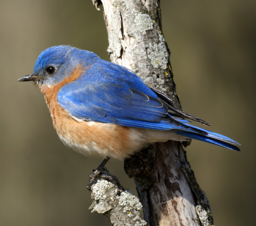

In [7]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [8]:
download_url??

Ahora hagamos lo mismo con "fotos del bosque":

Searching for 'forest photos'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


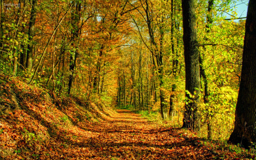

In [9]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

Nuestras búsquedas parecen estar dando resultados razonables, así que tomemos algunos ejemplos de cada una de las fotos de "pájaro" y "bosque", y guardemos cada grupo de fotos en una carpeta diferente (también estoy tratando de tomar una variedad de condiciones de iluminación aquí):

In [10]:
searches = 'bird','forest'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'
Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'


## Paso 2: Entrena a nuestro modelo

Es posible que algunas fotos no se descarguen correctamente, lo que podría provocar que falle el entrenamiento de nuestro modelo, por lo que las eliminaremos:

In [11]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

In [12]:
verify_images??

Para entrenar un modelo, necesitaremos `DataLoaders`, que es un objeto que contiene un *conjunto de entrenamiento* (las imágenes utilizadas para crear un modelo) y un *conjunto de validación* (las imágenes utilizadas para comprobar la precisión de un modelo -- no se utiliza durante el entrenamiento). En `fastai` podemos crear eso fácilmente usando un `DataBlock` y ver imágenes de muestra de él:

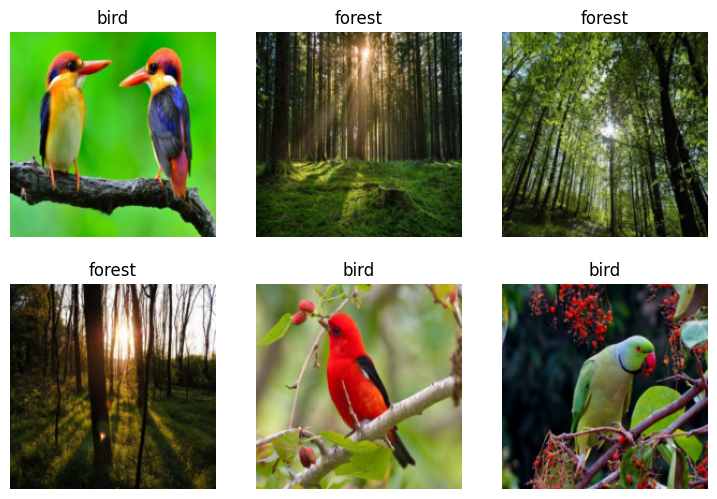

In [13]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Aquí lo que significa cada uno de los parámetros `DataBlock`:

     bloques=(ImagenBloque, CategoríaBloque),

Las entradas de nuestro modelo son imágenes y las salidas son categorías (en este caso, "pájaro" o "bosque").

     get_items=get_image_files,

Para encontrar todas las entradas de nuestro modelo, ejecute la función `get_image_files` (que devuelve una lista de todos los archivos de imagen en una ruta).

     splitter=RandomSplitter(valid_pct=0.2, seed=42),

Dividir los datos en conjuntos de entrenamiento y validación al azar, utilizando el 20 % de los datos para el conjunto de validación.

     get_y=etiqueta_principal,

Las etiquetas (valores `y`) son el nombre del `padre` de cada archivo (es decir, el nombre de la carpeta en la que se encuentran, que será *pájaro* o *bosque*).

     item_tfms=[Redimensionar(192, método='aplastar')]

Antes de entrenar, cambie el tamaño de cada imagen a 192x192 píxeles "aplastándola" (en lugar de recortarla).

Ahora estamos listos para entrenar nuestro modelo. El modelo de visión por computadora más rápido y ampliamente utilizado es `resnet18`. ¡Puedes entrenar esto en unos minutos, incluso en una CPU! (En una GPU, generalmente toma menos de 10 segundos...)

`fastai` viene con un útil método `fine_tune()` que usa automáticamente las mejores prácticas para ajustar con precisión un modelo previamente entrenado, así que lo usaremos.

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 244MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.073513,0.357257,0.156250,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.159614,0.095634,0.031250,00:01
1,0.115049,0.072679,0.031250,00:01
2,0.076802,0.078723,0.031250,00:01


Generalmente, cuando ejecuto esto, veo una precisión del 100% en el conjunto de validación (aunque puede variar un poco de una ejecución a otra).

"Fine-tuning" un modelo significa que comenzamos con un modelo que otra persona ha entrenado usando algún otro conjunto de datos (llamado el *modelo preentrenado*) y ajustamos un poco los pesos para que el modelo aprenda a reconocer su conjunto de datos en particular. . En este caso, el modelo preentrenado fue entrenado para reconocer fotos en *imagenet* y un conjunto de datos de visión por computadora ampliamente utilizado con imágenes que cubren 1000 categorías).

## Paso 3: Usa nuestro modelo (¡y crea el tuyo propio!)

Veamos qué piensa nuestro modelo sobre ese pájaro que descargamos al principio:

In [18]:
is_bird,_,probs = learn.predict(('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


In [19]:
Eis_bird,_,probs = learn.predict(('forest.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a forest: {probs[1]:.4f}")

This is a: bird.
Probability it's a forest: 0.9981


Buen trabajo, resnet18. :)

Entonces, como puede ver, en el espacio de unos pocos años, la creación de modelos de clasificación de visión por computadora ha pasado de ser "tan difícil que es una broma" a "trivialmente fácil y gratis".

No es solo en la visión por computadora. Gracias al aprendizaje profundo, las computadoras ahora pueden hacer muchas cosas que parecían imposibles hace solo unos años, como [crear increíbles obras de arte] (https://openai.com/dall-e-2/) y [explicar chistes] (https ://www.datanami.com/2022/04/22/googles-massive-new-language-model-can-explain-jokes/). Se está moviendo tan rápido que incluso los expertos en el campo tienen problemas para predecir cómo afectará a la sociedad en los próximos años.

Una cosa está clara: es importante que todos hagamos nuestro mejor esfuerzo para comprender esta tecnología, porque de lo contrario nos quedaremos atrás.

Ahora es tu turno. Haga clic en "Copiar y editar" e intente crear su propio clasificador de imágenes utilizando sus propias búsquedas de imágenes.

Si disfrutó esto, considere hacer clic en el botón "votar a favor" en la parte superior derecha; es muy alentador para nosotros, los autores de cuadernos, saber cuándo la gente aprecia nuestro trabajo.

In [ ]:
%%shell
jupyter nbconvert --to html /content/is_it_a_bird_creating_a_model_from_your_own_data.ipynb

[NbConvertApp] Converting notebook /content/is_it_a_bird_creating_a_model_from_your_own_data.ipynb to html
[NbConvertApp] Writing 1515782 bytes to /content/is_it_a_bird_creating_a_model_from_your_own_data.html
